Importing all the required libraries to complete the assignment

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup

### Task 1:
Obtain the 200 top-ranking universities in www.topuniversities.com ([ranking 2018](https://www.topuniversities.com/university-rankings/world-university-rankings/2018)).

In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total).

Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

In order to extract this information, we first examined the webpage using Postman Interceptor. We discovered that the data is not found in the html, rather it is imported from a [json file](https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508627223168) requested from the server.

So we make a request for this same file, and import the data from the json to a dataframe.

Since the data is sorted, we trim the dataframe to have only the top 200 results. Thus we have the Name, Rank, Country and Region for each of these universities. We drop the columns we do not require.

In order to get the remaining data, we keep the url column for now.

In [10]:
#import topuni data
topuni_url = 'https://www.topuniversities.com/sites/default/files/qs-rankings-data/357051.txt?_=1508627223168'
request = requests.get(topuni_url)
topuni_data = request.json()['data']

#add data to dataframe
topuni_df = pd.io.json.json_normalize(topuni_data)

#trim data frame to top 200 universities
topuni_df = topuni_df.head(200)

#drop columns that we don't need
topuni_df = topuni_df.drop(["cc", "core_id","logo","guide","nid","score","stars"],axis=1)

topuni_df

,country,rank_display,region,title,url
0,United States,1,North America,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...
1,United States,2,North America,Stanford University,/universities/stanford-university
2,United States,3,North America,Harvard University,/universities/harvard-university
3,United States,4,North America,California Institute of Technology (Caltech),/universities/california-institute-technology-...
4,United Kingdom,5,Europe,University of Cambridge,/universities/university-cambridge
5,United Kingdom,6,Europe,University of Oxford,/universities/university-oxford
6,United Kingdom,7,Europe,UCL (University College London),/universities/ucl-university-college-london
7,United Kingdom,8,Europe,Imperial College London,/universities/imperial-college-london
8,United States,9,North America,University of Chicago,/universities/university-chicago
9,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,/universities/eth-zurich-swiss-federal-institu...


Now we defined the `get_university_data()` function. This function takes the university url, and returns the data on student numbers (total and international) and faculty numbers (total and international).

To do so it uses the BeautifulSoup library.

In [11]:
#cleans the result, and returns an int.
def result2int(result):
    return int(result.replace('\n','').replace(' ','').replace(',',''))

#searches the soup for the class we are looking for, and once found returns the relevant data. If not found, returns NaN.
def search_uni_soup(soup, class_name):
    try:
        search_lv1 = soup.find('div',class_=class_name)
        search_lv2 = search_lv1.find('div',class_='number').text
        return result2int(search_lv2)
    except:
        return np.nan

def get_university_data(uni_url):
    req = requests.get('https://www.topuniversities.com'+uni_url)
    page_body = req.text
    soup = BeautifulSoup(page_body, 'html.parser')
    total_student = search_uni_soup(soup, 'total student')
    inter_student = search_uni_soup(soup, 'total inter')
    total_faculty = search_uni_soup(soup, 'total faculty')
    inter_faculty = search_uni_soup(soup, 'inter faculty')
    return total_student, inter_student, total_faculty, inter_faculty

#testing to see if get_university function is working
get_university_data('/universities/stanford-university')

(15878, 3611, 4285, 2042)

Next we decided to go through the results to see if we were having any errors. The code crashed on New York University, so we went back to the function and handled numbers not found as NaN. After this we parsed through all the results and saw that New York University and Indian Institute of Science Bangalore were the only 2 rows that had NaNs. We will have to handle these special cases.

In [4]:
#add uni data to the data frame
for index, url in enumerate(topuni_df['url']):
    print(get_university_data(url), url)

#results show error on New York University and Indian Institute of Science Bangalore. Need to handle these NaNs.

(11067, 3717, 2982, 1679) /universities/massachusetts-institute-technology-mit
(15878, 3611, 4285, 2042) /universities/stanford-university
(22429, 5266, 4350, 1311) /universities/harvard-university
(2255, 647, 953, 350) /universities/california-institute-technology-caltech
(18770, 6699, 5490, 2278) /universities/university-cambridge
(19720, 7353, 6750, 2964) /universities/university-oxford
(31080, 14854, 6345, 2554) /universities/ucl-university-college-london
(16090, 8746, 3930, 2071) /universities/imperial-college-london
(13557, 3379, 2449, 635) /universities/university-chicago
(19815, 7563, 2477, 1886) /universities/eth-zurich-swiss-federal-institute-technology
(25738, 7251, 4338, 2993) /universities/nanyang-technological-university-singapore-ntu
(10343, 5896, 1695, 1300) /universities/ecole-polytechnique-f%C3%A9d%C3%A9rale-de-lausanne-epfl
(8069, 1793, 1007, 246) /universities/princeton-university
(21904, 5411, 2718, 970) /universities/cornell-university
(32728, 8917, 5106, 3086) /u

(16135, 6806, 1885, 801) /universities/queen-mary-university-london
(18660, 1787, 2858, 246) /universities/kyushu-university
(35504, 4683, 3920, 473) /universities/university-maryland-college-park
(39112, 9688, 2961, 1037) /universities/universite-de-montreal
(24305, 4213, 2273, 253) /universities/universit%C3%A9-pierre-et-marie-curie-upmc
(38749, 9170, 3124, 551) /universities/university-southern-california
(9257, 1465, 1077, 336) /universities/chalmers-university-technology
(23149, 2128, 1449, 267) /universities/university-california-santa-barbara-ucsb
(12300, 4464, 1245, 435) /universities/lancaster-university
(15999, 3364, 1833, 636) /universities/university-york
(24565, 6090, 2755, 705) /universities/cardiff-university
(27003, 991, 2260, 198) /universities/pontificia-universidad-cat%C3%B3lica-de-chile-uc
(12147, 1831, 1257, 370) /universities/aalto-university
(23702, 3548, 3231, 1170) /universities/mcmaster-university
(44517, 8556, 3176, 449) /universities/rwth-aachen-university
(

Now that we know our functions are working we added the new columns to our dataframe.

In [12]:
#adding columns for total students and international students
topuni_df["Total_Students"] = topuni_df['url'].map(lambda x : get_university_data(x)[0])
topuni_df["International_Students"] = topuni_df['url'].map(lambda x : get_university_data(x)[1])

In [13]:
#adding columns for total faculty and international faculty
topuni_df["Total_Faculty"] = topuni_df['url'].map(lambda x : get_university_data(x)[2])
topuni_df["International_Faculty"] = topuni_df['url'].map(lambda x : get_university_data(x)[3])
topuni_df.head()

,country,rank_display,region,title,url,Total_Students,International_Students,Total_Faculty,International_Faculty
0,United States,1,North America,Massachusetts Institute of Technology (MIT),/universities/massachusetts-institute-technolo...,11067.0,3717.0,2982.0,1679.0
1,United States,2,North America,Stanford University,/universities/stanford-university,15878.0,3611.0,4285.0,2042.0
2,United States,3,North America,Harvard University,/universities/harvard-university,22429.0,5266.0,4350.0,1311.0
3,United States,4,North America,California Institute of Technology (Caltech),/universities/california-institute-technology-...,2255.0,647.0,953.0,350.0
4,United Kingdom,5,Europe,University of Cambridge,/universities/university-cambridge,18770.0,6699.0,5490.0,2278.0


We can now drop the url column

In [14]:
#drop columns that we don't need
topuni_df = topuni_df.drop(["url"],axis=1)
topuni_df.head()

,country,rank_display,region,title,Total_Students,International_Students,Total_Faculty,International_Faculty
0,United States,1,North America,Massachusetts Institute of Technology (MIT),11067.0,3717.0,2982.0,1679.0
1,United States,2,North America,Stanford University,15878.0,3611.0,4285.0,2042.0
2,United States,3,North America,Harvard University,22429.0,5266.0,4350.0,1311.0
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0


Now that we have our data we can solve the questions.
#### a) Which are the best universities in terms of the ratio between faculty and staff?
To answer this question we will add a new column which computes this ratio, and sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 faculty : 5 students is better than 1 faculty : 10 students)

In [15]:
topuni_df["Faculty/Student_ratio"] = topuni_df['Total_Faculty']/topuni_df['Total_Students']
topuni_df.sort_values("Faculty/Student_ratio",ascending=False).head()

,country,rank_display,region,title,Total_Students,International_Students,Total_Faculty,International_Faculty,Faculty/Student_ratio
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0,0.422616
15,United States,16,North America,Yale University,12402.0,2469.0,4940.0,1708.0,0.398323
5,United Kingdom,6,Europe,University of Oxford,19720.0,7353.0,6750.0,2964.0,0.342292
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0,0.292488
16,United States,17,North America,Johns Hopkins University,16146.0,4105.0,4462.0,1061.0,0.276353


The best university in terms of Faculty:Student ratio is **California Institute of Technology (Caltech)**

#### b) Which are the best universities in terms of the ratio of international students
To answer this question we will add a new column which computes the ratio between international students and total students, and sort our dataframe by this value. We assume that the higher the ratio, the better the university is. (1 international : 5 total is better than 1 international : 10 total)

In [17]:
topuni_df["Inter/Total_student_ratio"] = topuni_df['International_Students']/topuni_df['Total_Students']
topuni_df.sort_values("Inter/Total_student_ratio",ascending=False).head()

,country,rank_display,region,title,Total_Students,International_Students,Total_Faculty,International_Faculty,Faculty/Student_ratio,Inter/Total student_ratio,Inter/Total_student_ratio
34,United Kingdom,35,Europe,London School of Economics and Political Scien...,9760.0,6748.0,1088.0,687.0,0.111475,0.691393,0.691393
11,Switzerland,12,Europe,Ecole Polytechnique Fédérale de Lausanne (EPFL),10343.0,5896.0,1695.0,1300.0,0.163879,0.570047,0.570047
7,United Kingdom,8,Europe,Imperial College London,16090.0,8746.0,3930.0,2071.0,0.244251,0.543567,0.543567
198,Netherlands,200,Europe,Maastricht University,16385.0,8234.0,1277.0,502.0,0.077937,0.502533,0.502533
47,United States,=47,North America,Carnegie Mellon University,13356.0,6385.0,1342.0,425.0,0.100479,0.478062,0.478062


The best university in terms of International Student ratio is **London School of Economics and Political Science (LSE)**

#### c) Aggregate by country
To answer this question we will add aggregate all the values by country, and recalculate the Faculty:Student ratio and International:Total student ratio with the aggregated figures

In [18]:
topuni_country_df = topuni_df.drop(["Inter/Total_student_ratio", "Faculty/Student_ratio"],axis=1)
topuni_country_df = topuni_country_df.groupby("country",as_index=False).sum()
topuni_country_df["Faculty/Student_ratio"] = topuni_country_df['Total_Faculty']/topuni_country_df['Total_Students']
topuni_country_df["Inter/Total student_ratio"] = topuni_country_df['International_Students']/topuni_country_df['Total_Students']
topuni_country_df

,country,Total_Students,International_Students,Total_Faculty,International_Faculty,Inter/Total student_ratio,Faculty/Student_ratio
0,Argentina,122301.0,27109.0,16421.0,3165.0,0.221658,0.134267
1,Australia,301994.0,106359.0,22034.0,11382.0,0.352189,0.072962
2,Austria,63446.0,19667.0,4117.0,1572.0,0.309980,0.064890
3,Belgium,115067.0,17013.0,8046.0,2187.0,0.147853,0.069924
4,Brazil,92283.0,3052.0,7550.0,388.0,0.033072,0.081814
5,Canada,281514.0,73239.0,29317.0,10734.0,0.260161,0.104140
6,Chile,65851.0,3125.0,4516.0,325.0,0.047456,0.068579
7,China,235898.0,26833.0,27220.0,6720.0,0.113748,0.115389
8,Denmark,67223.0,9543.0,11916.0,3904.0,0.141960,0.177261
9,Finland,34566.0,3065.0,3902.0,905.0,0.088671,0.112885


In [19]:
topuni_country_df.sort_values("Faculty/Student_ratio",ascending=False).head()

,country,Total_Students,International_Students,Total_Faculty,International_Faculty,Inter/Total student_ratio,Faculty/Student_ratio
23,Russia,30233.0,5098.0,6709.0,373.0,0.168624,0.221910
8,Denmark,67223.0,9543.0,11916.0,3904.0,0.141960,0.177261
24,Saudi Arabia,6040.0,989.0,1062.0,665.0,0.163742,0.175828
25,Singapore,58466.0,16168.0,9444.0,6079.0,0.276537,0.161530
18,Malaysia,17902.0,3476.0,2755.0,655.0,0.194168,0.153893


The country that is best in terms of Faculty:Student ratio is **Russia**

In [21]:
topuni_country_df.sort_values("Inter/Total_student_ratio",ascending=False).head()

KeyError: 'Inter/Total_student_ratio'

The country that is best in terms of International Student ratio is **Australia**

#### d) Aggregate by region
To answer this question we will add aggregate all the values by region, and recalculate the Faculty:Student ratio and International:Total student ratio with the aggregated figures

In [22]:
topuni_region_df = topuni_df.drop(["Inter/Total_student_ratio", "Faculty/Student_ratio"],axis=1)
topuni_region_df = topuni_region_df.groupby("region",as_index=False).sum()
topuni_region_df["Faculty/Student_ratio"] = topuni_region_df['Total_Faculty']/topuni_region_df['Total_Students']
topuni_region_df["Inter/Total_student_ratio"] = topuni_region_df['International_Students']/topuni_region_df['Total_Students']
topuni_region_df

,region,Total_Students,International_Students,Total_Faculty,International_Faculty,Inter/Total student_ratio,Faculty/Student_ratio,Inter/Total_student_ratio
0,Africa,19593.0,3325.0,1733.0,379.0,0.169703,0.088450,0.169703
1,Asia,807003.0,110100.0,106734.0,25462.0,5.030969,0.132260,0.136431
2,Europe,1957251.0,449364.0,218358.0,67598.0,21.887973,0.111564,0.229589
3,Latin America,435750.0,36871.0,45382.0,5648.0,0.502260,0.104147,0.084615
4,North America,1546353.0,292116.0,182123.0,43836.0,10.729139,0.117776,0.188906
5,Oceania,350167.0,118798.0,25347.0,12786.0,3.619843,0.072385,0.339261


In [23]:
topuni_region_df.sort_values("Faculty/Student_ratio",ascending=False).head()

,region,Total_Students,International_Students,Total_Faculty,International_Faculty,Inter/Total student_ratio,Faculty/Student_ratio,Inter/Total_student_ratio
1,Asia,807003.0,110100.0,106734.0,25462.0,5.030969,0.132260,0.136431
4,North America,1546353.0,292116.0,182123.0,43836.0,10.729139,0.117776,0.188906
2,Europe,1957251.0,449364.0,218358.0,67598.0,21.887973,0.111564,0.229589
3,Latin America,435750.0,36871.0,45382.0,5648.0,0.502260,0.104147,0.084615
0,Africa,19593.0,3325.0,1733.0,379.0,0.169703,0.088450,0.169703


The region that is best in terms of Faculty:Student ratio is **Asia**

In [24]:
topuni_region_df.sort_values("Inter/Total_student_ratio",ascending=False).head()

,region,Total_Students,International_Students,Total_Faculty,International_Faculty,Inter/Total student_ratio,Faculty/Student_ratio,Inter/Total_student_ratio
5,Oceania,350167.0,118798.0,25347.0,12786.0,3.619843,0.072385,0.339261
2,Europe,1957251.0,449364.0,218358.0,67598.0,21.887973,0.111564,0.229589
4,North America,1546353.0,292116.0,182123.0,43836.0,10.729139,0.117776,0.188906
0,Africa,19593.0,3325.0,1733.0,379.0,0.169703,0.088450,0.169703
1,Asia,807003.0,110100.0,106734.0,25462.0,5.030969,0.132260,0.136431


The region that is best in terms of International Student ratio is **Oceania**

### Task 2:
Obtain the 200 top-ranking universities in www.timeshighereducation.com ([ranking 2018](http://timeshighereducation.com/world-university-rankings/2018/world-ranking)).

In particular, extract the following fields for each university: name, rank, country and region, number of faculty members (international and total) and number of students (international and total).

Store the resulting dataset in a pandas DataFrame and answer the following questions:
- Which are the best universities in term of: (a) ratio between faculty members and students, (b) ratio of international students?
- Answer the previous question aggregating the data by (c) country and (d) region.

In order to extract this information, we first examined the webpage using Postman Interceptor. We discovered that the data is not found in the html, rather it is imported from a [json file](https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json) requested from the server.

So we make a request for this same file, and import the data from the json to a dataframe.

Since the data is sorted, we trim the dataframe to have only the top 200 results. Thus we have the Name, Rank, Country and Region for each of these universities. We drop the columns we do not require.

In order to get the remaining data, we keep the url column for now.

In [25]:
#import timesedu data
timesedu_url = 'https://www.timeshighereducation.com/sites/default/files/the_data_rankings/world_university_rankings_2018_limit0_369a9045a203e176392b9fb8f8c1cb2a.json'
request = requests.get(timesedu_url)
timesedu_data = request.json()['data']

#add data to dataframe
timesedu_df = pd.io.json.json_normalize(timesedu_data)

#trim data frame to top 200 universities
timesedu_df = timesedu_df.head(200)

#drop columns that we don't need
timesedu_df = timesedu_df.drop(["member_level","nid","url","scores_international_outlook","scores_international_outlook_rank","scores_overall","scores_overall_rank","record_type","scores_research","scores_research_rank","scores_teaching","scores_teaching_rank","stats_female_male_ratio","subjects_offered","scores_citations","scores_citations_rank","scores_industry_income","scores_industry_income_rank"],axis=1)
timesedu_df

,aliases,location,name,rank,rank_order,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio
0,University of Oxford,United Kingdom,University of Oxford,1,10,"20,409",38%,11.2
1,University of Cambridge,United Kingdom,University of Cambridge,2,20,"18,389",35%,10.9
2,California Institute of Technology caltech,United States,California Institute of Technology,=3,30,"2,209",27%,6.5
3,Stanford University,United States,Stanford University,=3,40,"15,845",22%,7.5
4,Massachusetts Institute of Technology,United States,Massachusetts Institute of Technology,5,50,"11,177",34%,8.7
5,Harvard University,United States,Harvard University,6,60,"20,326",26%,8.9
6,Princeton University,United States,Princeton University,7,70,"7,955",24%,8.3
7,Imperial College London,United Kingdom,Imperial College London,8,80,"15,857",55%,11.4
8,University of Chicago,United States,University of Chicago,9,90,"13,525",25%,6.2
9,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,ETH Zurich – Swiss Federal Institute of Techno...,=10,100,"19,233",38%,14.6


In [26]:
#addRegions
mappingDict = {}
for row in topuni_df.iterrows():
    mappingDict[row[1][0]] = row[1][2]

#manually adding missing countries/alternative spellings in dict
mappingDict['Luxembourg'] = 'Europe'
mappingDict['Russian Federation'] = 'Europe'

timesedu_df['Region'] = timesedu_df['location'].map(mappingDict)
timesedu_df.head()

,aliases,location,name,rank,rank_order,stats_number_students,stats_pc_intl_students,stats_student_staff_ratio,Region
0,University of Oxford,United Kingdom,University of Oxford,1,10,"20,409",38%,11.2,Europe
1,University of Cambridge,United Kingdom,University of Cambridge,2,20,"18,389",35%,10.9,Europe
2,California Institute of Technology caltech,United States,California Institute of Technology,=3,30,"2,209",27%,6.5,North America
3,Stanford University,United States,Stanford University,=3,40,"15,845",22%,7.5,North America
4,Massachusetts Institute of Technology,United States,Massachusetts Institute of Technology,5,50,"11,177",34%,8.7,North America


In [27]:
#adding columns for international students
timesedu_df["Total_Students"] = timesedu_df['stats_number_students'].map(lambda x : x.replace(',',''))
timesedu_df["Inter/Total_student_ratio"] = (timesedu_df['stats_pc_intl_students'].map(lambda x : x.replace('%','')).map(int))/100
timesedu_df["International_Students"] = ((timesedu_df['Total_Students'].map(float))*(timesedu_df['Inter/Total_student_ratio'].map(float))).map(int)
timesedu_df.head()

# #adding columns for total faculty and international faculty
timesedu_df["Total_Faculty"] = (timesedu_df["Total_Students"].map(float)/timesedu_df["stats_student_staff_ratio"].map(float)).map(int)
timesedu_df["International_Faculty"] = float('NaN')
timesedu_df["Faculty/Student_ratio"] = 1/timesedu_df["stats_student_staff_ratio"].map(float)

timesedu_df = timesedu_df.drop(["stats_number_students","stats_pc_intl_students","stats_student_staff_ratio"],axis=1)

timesedu_df.head()



# timesedu_df["Faculty/Student ratio"] = topuni_df['Total Faculty']/topuni_df['Total Students']

# timesedu_df.sort_values("Faculty/Student ratio",ascending=False).head()


,aliases,location,name,rank,rank_order,Region,Total_Students,Inter/Total_student_ratio,International_Students,Total_Faculty,International_Faculty,Faculty/Student_ratio
0,University of Oxford,United Kingdom,University of Oxford,1,10,Europe,20409,0.38,7755,1822,NaN,0.089286
1,University of Cambridge,United Kingdom,University of Cambridge,2,20,Europe,18389,0.35,6436,1687,NaN,0.091743
2,California Institute of Technology caltech,United States,California Institute of Technology,=3,30,North America,2209,0.27,596,339,NaN,0.153846
3,Stanford University,United States,Stanford University,=3,40,North America,15845,0.22,3485,2112,NaN,0.133333
4,Massachusetts Institute of Technology,United States,Massachusetts Institute of Technology,5,50,North America,11177,0.34,3800,1284,NaN,0.114943


### Task 3 :
In this section , we will merge the two dataframes into one using the names of the universities as a link between them.
However, some of these names are different in each dataframes;
for example the EPFL is represented as *Ecole Polytechnique Fédérale de Lausanne (EPFL)* in the the Top Universities ranking and *École Polytechnique Fédérale de Lausanne* in the Times Education ranking.

In this case, the `merge` operation wouldn't work unless we simplify the name strings and remove the elements that might create a difference between the two lists.
Here is a list of operations we perform on both the 'aliases' column in Top Universities ranking and the 'title' in the  Times Education ranking to make them closer : 
- We turn them into lowercase
- Using Regular Expressions, we delete the acronyms in parenthesis
- we replace all non- alphanumerical characters (for example - , _ ,...) with a simple whitespace
- we remove the accents that are present in the french names, replacing 'é' and 'è' by e.



In [213]:
import re
  # treating the universities titles from Top Universites :
#create an empty list and save the "treated" name strings in it 
new_name2=[]
for name in topuni_df.title:
    words=name.lower()
    words=re.sub("(\s+\(\w+\))",'', words)
    words=re.sub("(the+\s)",'', words)
    words = re.sub('\W+',' ',words)
    words = re.sub('é|è','e',words)
    new_name2.append(words)
#add the list as a column to the Top University dataframe
topuni_df['name_for_merge']=new_name2
 

  # treating the universities titles from Times Education :
#create an empty list and save the "treated" name strings in it 
new_name3=[]
for nam in timesedu_df.name:
    words=nam.lower()
    words=re.sub("(\s+\(\w+\))",'', words)
    words=re.sub("(the+\s)",'', words)
    words = re.sub('\W+',' ',words)
    words = re.sub('é|è','e',words)
    new_name3.append(words)
#add the list as a column to the Times Education dataframe
timesedu_df['name_for_merge']=new_name3

École Polytechnique Fédérale de Lausanne


Having performed these operations, we save the new names in a new column in each dataframe called `name_for_merge`.
We now perform an *outer* merge based on these new names.

In [29]:

test3=pd.merge(topuni_df,timesedu_df,on='name_for_merge',how='outer')
test3

,country,rank_display,region,title,Total_Students_x,International_Students_x,Total_Faculty_x,International_Faculty_x,Faculty/Student_ratio_x,Inter/Total student_ratio,...,name,rank,rank_order,Region,Total_Students_y,Inter/Total_student_ratio_y,International_Students_y,Total_Faculty_y,International_Faculty_y,Faculty/Student_ratio_y
0,United States,1,North America,Massachusetts Institute of Technology (MIT),11067.0,3717.0,2982.0,1679.0,0.269450,0.335863,...,Massachusetts Institute of Technology,5,50,North America,11177,0.34,3800.0,1284.0,NaN,0.114943
1,United States,2,North America,Stanford University,15878.0,3611.0,4285.0,2042.0,0.269870,0.227422,...,Stanford University,=3,40,North America,15845,0.22,3485.0,2112.0,NaN,0.133333
2,United States,3,North America,Harvard University,22429.0,5266.0,4350.0,1311.0,0.193945,0.234785,...,Harvard University,6,60,North America,20326,0.26,5284.0,2283.0,NaN,0.112360
3,United States,4,North America,California Institute of Technology (Caltech),2255.0,647.0,953.0,350.0,0.422616,0.286918,...,California Institute of Technology,=3,30,North America,2209,0.27,596.0,339.0,NaN,0.153846
4,United Kingdom,5,Europe,University of Cambridge,18770.0,6699.0,5490.0,2278.0,0.292488,0.356899,...,University of Cambridge,2,20,Europe,18389,0.35,6436.0,1687.0,NaN,0.091743
5,United Kingdom,6,Europe,University of Oxford,19720.0,7353.0,6750.0,2964.0,0.342292,0.372870,...,University of Oxford,1,10,Europe,20409,0.38,7755.0,1822.0,NaN,0.089286
6,United Kingdom,7,Europe,UCL (University College London),31080.0,14854.0,6345.0,2554.0,0.204151,0.477928,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,United Kingdom,8,Europe,Imperial College London,16090.0,8746.0,3930.0,2071.0,0.244251,0.543567,...,Imperial College London,8,80,Europe,15857,0.55,8721.0,1390.0,NaN,0.087719
8,United States,9,North America,University of Chicago,13557.0,3379.0,2449.0,635.0,0.180645,0.249244,...,University of Chicago,9,90,North America,13525,0.25,3381.0,2181.0,NaN,0.161290
9,Switzerland,10,Europe,ETH Zurich - Swiss Federal Institute of Techno...,19815.0,7563.0,2477.0,1886.0,0.125006,0.381681,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The resulting dataframe is composed of 141 universities and 23 variables.
It means that there are 59 universities that were not matched correctly during the merge. 

This can be due either to 
- the fact that some universities are present in only one of the rankings 
or
- the fact that they are not represented in the same way in both, even after the simplications performed above.

In the first case,the universities will be removed, in the second, the matching has to be done manually.
We view these universities here. 

In [215]:
#names of the universities from the Top University ranking 
#that are not matched to universities from the Times Education Ranking
a=pd.Series(test3[test3.title.isnull()]['name_for_merge'].values)
a.name='Top Universities Ranking'
print(a.shape)

#names of the universities from the Times Education Ranking 
#that are not matched to universities from the Top University ranking
b=pd.Series(test3[test3.aliases.isnull()]['name_for_merge'].values)
b.name='Times Education Ranking'
print(b.shape)
pd.concat([a,b],axis=1)

(59,)
(48,)


,Top Universities Ranking,Times Education Ranking
0,eth zurich swiss federal institute of technolo...,ecole normale superieure paris
1,university college london,tokyo institute of technology
2,lmu munich,osaka university
3,karolinska institute,ludwig maximilians universität münchen
4,heidelberg university,ruprecht karls universität heidelberg
5,university of north carolina at chapel hill,universidad de buenos aires
6,humboldt university of berlin,tohoku university
7,wageningen university research,korea university
8,paris sciences et lettres psl research univers...,yonsei university
9,university of freiburg,universiti malaya


In [ ]:
In order to 

In [31]:
#create a dataFrame containing the unmatched names from Top Universities
a=pd.DataFrame(test3[test3.title.isnull()]['name_for_merge'])
print(a.shape)
#add a new column to each name where we will store the corresponding index #
a['correspond']=0

(59, 1)


In [32]:
#Create a dataFrame containing the unmatched names from Times Education
match_list=pd.DataFrame(test3[test3.name.isnull()]['name_for_merge'])
print(match_list.shape)

(59, 1)


In [157]:
#we split each unmatched name in Top University it into a list of words and store them in 'check'
j=258
print(a.name_for_merge[j])
check=a.name_for_merge[j].split()

score=[]
# for each unmatched name in Times Education, we count how many words of 'check' it contains 
for i in match_list.name_for_merge:
    k=0
    for word in check:
        if i.find(word)>0:
            k=k+1
    score.append(k)
#We store the number of the commun words in a new column 'score'
#Then we view the names with the largest scores. 
#If the university is represented by a similar name in the other ranking,
#this name should be on the top of this list and we can extract its index

match_list['score']=score
    
match_list.sort_values('score',ascending=False).head(50)


university of gothenburg


,name_for_merge,score
172,king fahd university of petroleum minerals,2
184,vienna university of technology,2
132,chalmers university of technology,2
87,trinity college dublin university of dublin,2
187,alma mater studiorum university of bologna,2
144,hebrew university of jerusalem,2
6,ucl university college london,1
9,eth zurich swiss federal institute of technology,1
123,wageningen university,1
127,kyushu university,1


In [141]:
#We copy the content of the second ranking in the correct row 
m=181
test3.iloc[m,12:]=test3.iloc[j,12:]
test3.iloc[m]

country                                                 Belgium
rank_display                                               =182
region                                                   Europe
title                          Vrije Universiteit Brussel (VUB)
Total_Students_x                                           9284
International_Students_x                                   1853
Total_Faculty_x                                            1792
International_Faculty_x                                     515
Faculty/Student_ratio_x                                 0.19302
Inter/Total student_ratio                              0.199591
Inter/Total_student_ratio_x                            0.199591
name_for_merge                       vrije universiteit brussel
aliases                           Université Libre de Bruxelles
location                                                Belgium
name                              Université Libre de Bruxelles
rank                                    

In [198]:
#We reorder the dataframe and drop the universities left unmatched
final=test3.iloc[:,[3,12,1,15,0,2,4,18,6,21,8,23,5,20,10,19,7,22]]
final=final.dropna(thresh=13)

In [ ]:
final

In [204]:
#we save the resulting dataframe into a .csv file 
final.to_csv("final.csv")


### Task 4 
Find useful insights in the data by performing an exploratory analysis. Can you find a strong correlation between any pair of variables in the dataset you just created? Example: when a university is strong in its international dimension, can you observe a consistency both for students and faculty members?

In [ ]:
test4 = pd.read_csv("final.csv")

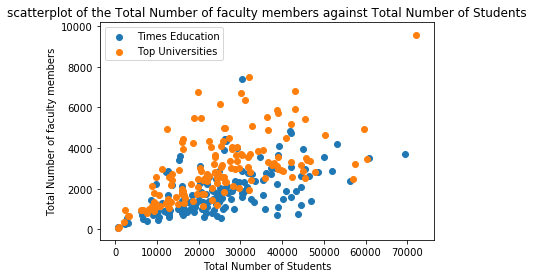

In [26]:

def create_plot (x,y,xlab,ylab): 
    
    sc1=scatter(test4[str(x+'_y')],test4[str(y+'_y')],label='Times Education')
    sc2=scatter(test4[str(x+'_x')],test4[str(y+'_x')],label='Top Universities')
    plt.ylabel(ylab)
    plt.xlabel(xlab)    
    plt.title('scatterplot of the '+ylab+' against '+xlab)
    plt.legend(handles=[sc1,sc2])
    plt.show()    

create_plot('Total_Students','Total_Faculty','Total Number of Students','Total Number of faculty members')
#create_plot('test4.','Sex','Number of passengers',ax2)



Joining the two dataframes enables us to compare the rankings of the universities and the factors that helped determine it.

We notice that the 6 first universities are the same in both rankings, all from USA or the UK.
For other universities, the ranks are  often close,although in some cases it varies significantly ( 
Nanyang Technological University, Singapore (NTU) who is $11^{th}$ in *Top Universities* and $52^{nd}$ in *Times Education*.)

These differences are due to the fact that the ranking scores are computed differently in each dataframe.
The scores are computed as a combination of various indicators such as the number of students,the size of the faculty ,the international presence, but also faculty reputation and number of citations which are not available in our dataframe.
In this section we will only deal with the indicators available in the merged dataframe and try to  determine their role in the score of the universities in each ranking.


In [35]:
scatter(test4.rank_display,test4.Total_Students_x)
scatter(test4.rank_display,test4.Total_Students_y)


ValueError: could not convert string to float: '=195'

ValueError: could not convert string to float: '=195'

In [40]:
test4.rank_display.values[0]

'1'

In [11]:
test4

,Unnamed: 0,title,aliases,rank_display,rank,country,region,Total_Students_x,Total_Students_y,Total_Faculty_x,Total_Faculty_y,Faculty/Student_ratio_x,Faculty/Student_ratio_y,International_Students_x,International_Students_y,Inter/Total_student_ratio_x,Inter/Total_student_ratio_y,International_Faculty_x,International_Faculty_y
0,0,Massachusetts Institute of Technology (MIT),Massachusetts Institute of Technology,1,5,United States,North America,11067.0,11177,2982.0,1284.0,0.269450,0.114943,3717.0,3800.0,0.335863,0.34,1679.0,NaN
1,1,Stanford University,Stanford University,2,=3,United States,North America,15878.0,15845,4285.0,2112.0,0.269870,0.133333,3611.0,3485.0,0.227422,0.22,2042.0,NaN
2,2,Harvard University,Harvard University,3,6,United States,North America,22429.0,20326,4350.0,2283.0,0.193945,0.112360,5266.0,5284.0,0.234785,0.26,1311.0,NaN
3,3,California Institute of Technology (Caltech),California Institute of Technology caltech,4,=3,United States,North America,2255.0,2209,953.0,339.0,0.422616,0.153846,647.0,596.0,0.286918,0.27,350.0,NaN
4,4,University of Cambridge,University of Cambridge,5,2,United Kingdom,Europe,18770.0,18389,5490.0,1687.0,0.292488,0.091743,6699.0,6436.0,0.356899,0.35,2278.0,NaN
5,5,University of Oxford,University of Oxford,6,1,United Kingdom,Europe,19720.0,20409,6750.0,1822.0,0.342292,0.089286,7353.0,7755.0,0.372870,0.38,2964.0,NaN
6,6,UCL (University College London),University College London ucl,7,16,United Kingdom,Europe,31080.0,30304,6345.0,2886.0,0.204151,0.095238,14854.0,14848.0,0.477928,0.49,2554.0,NaN
7,7,Imperial College London,Imperial College London,8,8,United Kingdom,Europe,16090.0,15857,3930.0,1390.0,0.244251,0.087719,8746.0,8721.0,0.543567,0.55,2071.0,NaN
8,8,University of Chicago,University of Chicago,9,9,United States,North America,13557.0,13525,2449.0,2181.0,0.180645,0.161290,3379.0,3381.0,0.249244,0.25,635.0,NaN
9,9,ETH Zurich - Swiss Federal Institute of Techno...,ETH Zurich – Swiss Federal Institute of Techno...,10,=10,Switzerland,Europe,19815.0,19233,2477.0,1317.0,0.125006,0.068493,7563.0,7308.0,0.381681,0.38,1886.0,NaN
